In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from lightgbm import LGBMRegressor
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Senza Onehot

In [2]:
X_train.describe()

NameError: name 'X_train' is not defined

### Dataset

In [3]:
X_train = pd.read_csv('data_no_onehot/X_train')
y_train = np.array(pd.read_csv('data_no_onehot/y_train')) * (1/100)

X_test = pd.read_csv('data_no_onehot/X_test')
y_test = np.array(pd.read_csv('data_no_onehot/y_test')) * (1/100)

In [4]:
X_train = X_train.astype({'explicit': 'category', 'key': 'category', 'mode':'category', 'time_signature':'category', 'genre':'category',
                          'duration_ms' : 'float32', 'danceability': 'float32', 'energy': 'float32', 'loudness': 'float32', 'speechiness': 'float32',
       'acousticness': 'float32', 'instrumentalness': 'float32', 'liveness': 'float32', 'valence': 'float32', 'tempo': 'float32', 'tempo_confidence': 'float32', 'time_signature_confidence': 'float32',
       'key_confidence': 'float32', 'mode_confidence': 'float32', 'popularity_x': 'float32', 'followers': 'float32'})

X_test = X_test.astype({'explicit': 'category', 'key': 'category', 'mode':'category', 'time_signature':'category', 'genre':'category',
                          'duration_ms' : 'float32', 'danceability': 'float32', 'energy': 'float32', 'loudness': 'float32', 'speechiness': 'float32',
       'acousticness': 'float32', 'instrumentalness': 'float32', 'liveness': 'float32', 'valence': 'float32', 'tempo': 'float32', 'tempo_confidence': 'float32', 'time_signature_confidence': 'float32',
       'key_confidence': 'float32', 'mode_confidence': 'float32', 'popularity_x': 'float32', 'followers': 'float32'})

In [5]:
X_t, X_v, y_t, y_v = train_test_split(X_train, y_train, test_size=0.1, random_state=8)

### Model Selection

In [6]:
reg = LGBMRegressor(boosting_type='gbdt',  #'goss', #'dart'
                     max_depth=-1, # no limit
                     num_leaves=30,
                     n_estimators=300,
                     subsample_for_bin=20000,
                     reg_alpha=0.001, #L1 regularization term on weights
                     reg_lambda=0.001, #L2 regularization term on weights
                     random_state=8
                   )
reg.fit(X_t, y_t)

reg.score(X_v, y_v)

c:\Users\giuli\anaconda3\envs\DEEPL\lib\site-packages\lightgbm\basic.py:335: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3993
[LightGBM] [Info] Number of data points in the train set: 40022, number of used features: 21
[LightGBM] [Info] Start training from score 0.325898


0.4683332688010753

### Test

In [7]:
reg = LGBMRegressor(boosting_type='gbdt',  #'goss', #'dart'
                     max_depth=-1, # no limit
                     num_leaves=30,
                     n_estimators=300,
                     subsample_for_bin=20000,
                     reg_alpha=0.001, #L1 regularization term on weights
                     reg_lambda=0.001, #L2 regularization term on weights
                     random_state=8
                   )
reg.fit(X_train, y_train)
y_pred =  reg.predict(X_test)
print(f'R2: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'Correlation: {pearsonr(np.squeeze(y_test), y_pred)}')

c:\Users\giuli\anaconda3\envs\DEEPL\lib\site-packages\lightgbm\basic.py:335: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3994
[LightGBM] [Info] Number of data points in the train set: 44469, number of used features: 21
[LightGBM] [Info] Start training from score 0.325360
R2: 0.46617028783162784
MSE: 0.02250406646907412
MAE: 0.10398018609608167
Correlation: PearsonRResult(statistic=0.6828072168726931, pvalue=0.0)


### Feature Importance

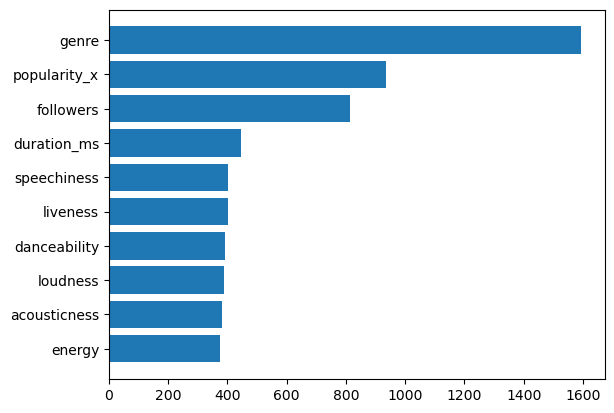

In [8]:


feature_imp = reg.feature_importances_
feature_names = reg.feature_name_

coef_list1 = sorted([(feature,coef) for feature,coef in zip(feature_names, feature_imp)], key= lambda x: abs(x[1]), reverse=True)
plt.barh(list(reversed([el[0] for el in coef_list1[:10]])),list(reversed([abs(el[1]) for el in coef_list1[:10]])))
plt.show()

## Con EX. Gradient Boosting

In [9]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

In [10]:
reg = ExplainableBoostingRegressor(n_jobs=-1)
reg.fit(X_train, y_train)

ExplainableBoostingRegressor(n_jobs=-1)

In [11]:
y_pred =  reg.predict(X_test)
print(f'R2: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'Correlation: {pearsonr(np.squeeze(y_test), y_pred)}')

R2: 0.43934561991317145
MSE: 0.023634884211300847
MAE: 0.1096070530999665
Correlation: PearsonRResult(statistic=0.6628682384372031, pvalue=0.0)


In [12]:
exdata = reg.explain_global().data(20)
exdata

{'type': 'univariate',
 'names': ['acoustic',
  'afrobeat',
  'alt-rock',
  'alternative',
  'ambient',
  'anime',
  'black-metal',
  'bluegrass',
  'blues',
  'brazil',
  'breakbeat',
  'british',
  'cantopop',
  'chicago-house',
  'children',
  'chill',
  'classical',
  'club',
  'comedy',
  'country',
  'dance',
  'dancehall',
  'death-metal',
  'deep-house',
  'detroit-techno',
  'disco',
  'disney',
  'drum-and-bass',
  'dub',
  'dubstep',
  'edm',
  'electro',
  'electronic',
  'emo',
  'folk',
  'forro',
  'french',
  'funk',
  'garage',
  'german',
  'gospel',
  'goth',
  'grindcore',
  'groove',
  'grunge',
  'guitar',
  'happy',
  'hard-rock',
  'hardcore',
  'hardstyle',
  'heavy-metal',
  'hip-hop',
  'honky-tonk',
  'house',
  'idm',
  'indian',
  'indie',
  'indie-pop',
  'industrial',
  'iranian',
  'j-dance',
  'j-idol',
  'j-pop',
  'j-rock',
  'jazz',
  'k-pop',
  'kids',
  'latin',
  'latino',
  'malay',
  'mandopop',
  'metal',
  'metalcore',
  'minimal-techno',
  '

In [24]:
genres_names = [name for name,score in zip(exdata['names'], exdata['scores']) if abs(score) > 0.09]
genres_scores = [score for name,score in zip(exdata['names'], exdata['scores']) if abs(score) > 0.09]
genres_color = ['#3262a8' if score <0 else '#e67b17' for score in genres_scores]

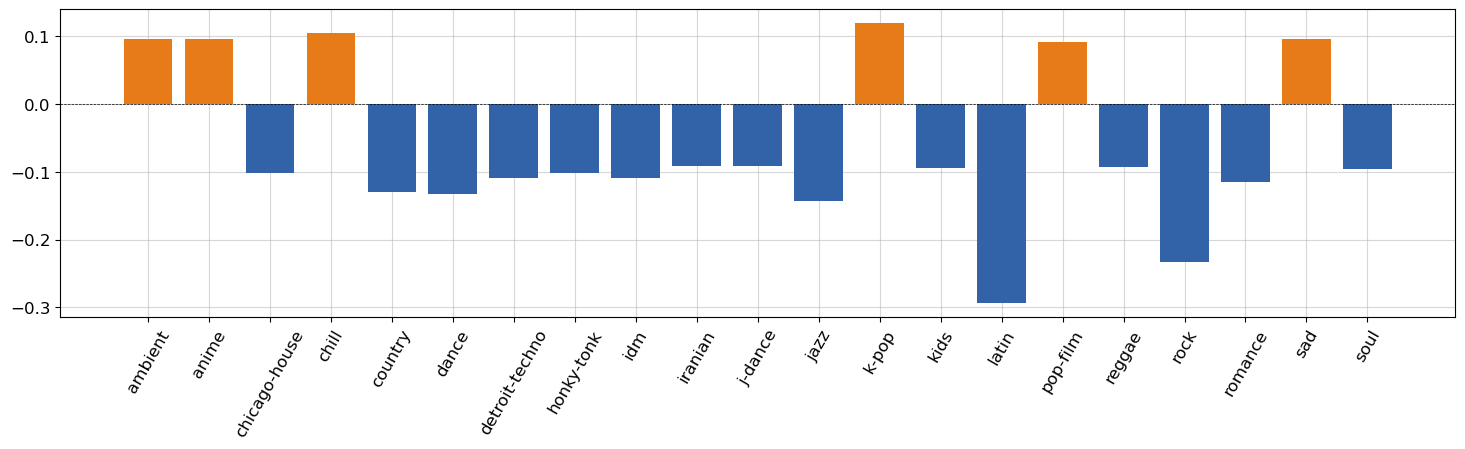

In [25]:
plt.figure(figsize=(18,4))
plt.grid(zorder=1, alpha=0.5)
plt.bar(genres_names, genres_scores, color=genres_color, zorder=2)
plt.xticks(rotation=60)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.axhline(c='black', linewidth=0.5, linestyle='--')

plt.show()

In [26]:
y_train.mean()

0.32536013852346574

In [20]:
show(reg.explain_global())

<!-- http://127.0.0.1:7001/2497671625888/ -->

In [10]:
show(reg.explain_local(X_test[100:200], y_test[100:200]))

<!-- http://127.0.0.1:7001/2432120913824/ -->

In [12]:
exdata = reg.explain_local(X_test[132:133], y_test[132:133]).data(0)
exdata

{'type': 'univariate',
 'names': ['duration_ms',
  'danceability',
  'energy',
  'loudness',
  'speechiness',
  'acousticness',
  'instrumentalness',
  'liveness',
  'valence',
  'tempo',
  'tempo_confidence',
  'time_signature_confidence',
  'key_confidence',
  'mode_confidence',
  'popularity_x',
  'followers',
  'explicit',
  'key',
  'mode',
  'time_signature',
  'genre',
  'duration_ms & popularity_x',
  'duration_ms & followers',
  'duration_ms & genre',
  'danceability & acousticness',
  'danceability & followers',
  'loudness & acousticness',
  'speechiness & popularity_x',
  'acousticness & popularity_x',
  'acousticness & followers',
  'instrumentalness & popularity_x',
  'instrumentalness & followers',
  'instrumentalness & genre',
  'liveness & popularity_x',
  'liveness & followers',
  'valence & popularity_x',
  'valence & followers',
  'popularity_x & followers',
  'popularity_x & genre',
  'followers & explicit',
  'followers & genre'],
 'scores': [-8.806707386025988e-0

In [26]:
def round_if(a):
    try:
        res = round(a, 3)
    except:
        res = a
    return res

In [27]:
g = sorted([(name,score, value) for name,score,value in zip(exdata['names'], exdata['scores'], exdata['values'])], key= lambda x: abs(x[1]), reverse=True)

local_names = ['intercept'] + [f'{el[0]} ({round_if(el[2])})' for el in g[:15]]
local_scores = [0.325] + [round(el[1],3) for el in g[:15]]

local_color = ['grey'] + ['#3262a8' if score <0 else '#e67b17' for score in local_scores[1:]]

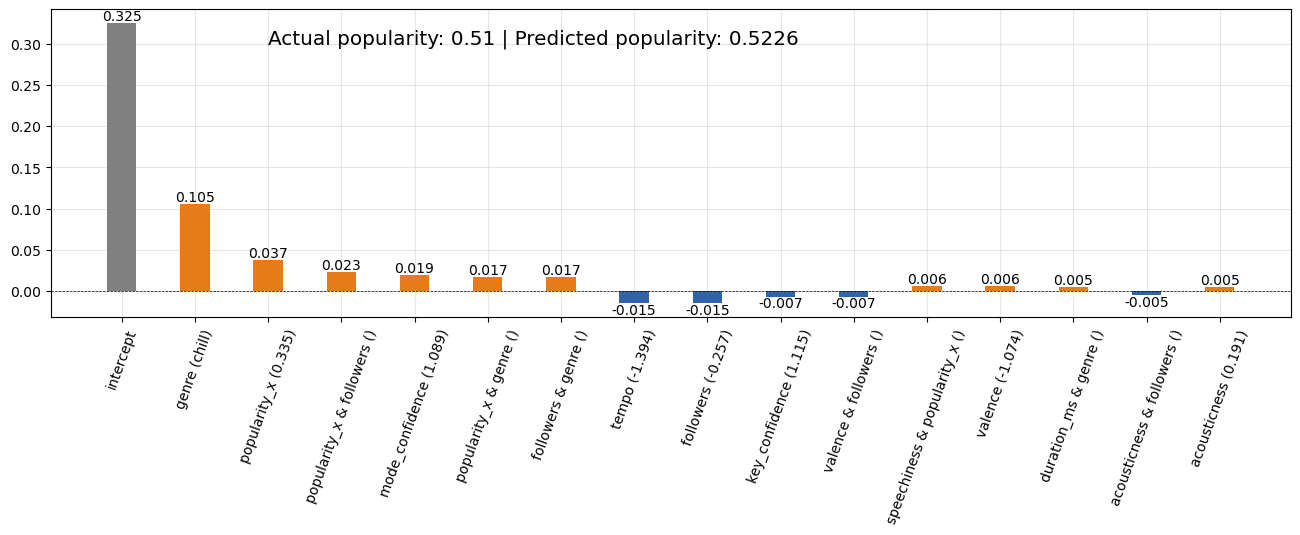

In [28]:
plt.figure(figsize=(16,4))
plt.grid(zorder=1, alpha=0.3)
bars = plt.bar(local_names, local_scores, color=local_color, zorder=2, width=0.4)
plt.xticks(rotation=70)

plt.text(x=2, y=0.3, s=f'Actual popularity: {0.51} | Predicted popularity: {0.5226}', fontsize='x-large')

#plt.tick_params(axis='both', which='major', labelsize=12)
#plt.tick_params(axis='both', which='minor', labelsize=10)
plt.bar_label(bars, padding=0)
plt.axhline(c='black', linewidth=0.5, linestyle='--')

plt.show()

# Con Onehot

In [3]:
X_train = pd.read_csv('data_onehot/X_train')
y_train = np.array(pd.read_csv('data_onehot/y_train')) * (1/100)

X_test = pd.read_csv('data_onehot/X_test')
y_test = np.array(pd.read_csv('data_onehot/y_test')) * (1/100)

In [4]:
X_train.shape

(44469, 151)

In [5]:
X_t, X_v, y_t, y_v = train_test_split(X_train, y_train, test_size=0.1, random_state=8)

In [6]:
reg = LGBMRegressor(boosting_type='gbdt',  #'goss', #'dart'
                     max_depth=-1, # no limit
                     num_leaves=30,
                     n_estimators=300,
                     subsample_for_bin=20000,
                     reg_alpha=0.001, #L1 regularization term on weights
                     reg_lambda=0.001, #L2 regularization term on weights
                     random_state=8
                   )
reg.fit(X_t, y_t)

reg.score(X_v, y_v)

c:\Users\giuli\anaconda3\envs\DEEPL\lib\site-packages\lightgbm\basic.py:335: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4121
[LightGBM] [Info] Number of data points in the train set: 40022, number of used features: 149
[LightGBM] [Info] Start training from score 0.325898


0.4603869915863953

### Test

In [7]:
reg = LGBMRegressor(boosting_type='gbdt',  #'goss', #'dart'
                     max_depth=-1, # no limit
                     num_leaves=30,
                     n_estimators=300,
                     subsample_for_bin=20000,
                     reg_alpha=0.001, #L1 regularization term on weights
                     reg_lambda=0.001, #L2 regularization term on weights
                     random_state=8
                   )
reg.fit(X_train, y_train)
y_pred =  reg.predict(X_test)
print(f'R2: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'Correlation: {pearsonr(np.squeeze(y_test), y_pred)}')

c:\Users\giuli\anaconda3\envs\DEEPL\lib\site-packages\lightgbm\basic.py:335: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4122
[LightGBM] [Info] Number of data points in the train set: 44469, number of used features: 149
[LightGBM] [Info] Start training from score 0.325360
R2: 0.4602447438329851
MSE: 0.02275386304834137
MAE: 0.10647018056955465
Correlation: PearsonRResult(statistic=0.6794069615259127, pvalue=0.0)


### Feature Importances

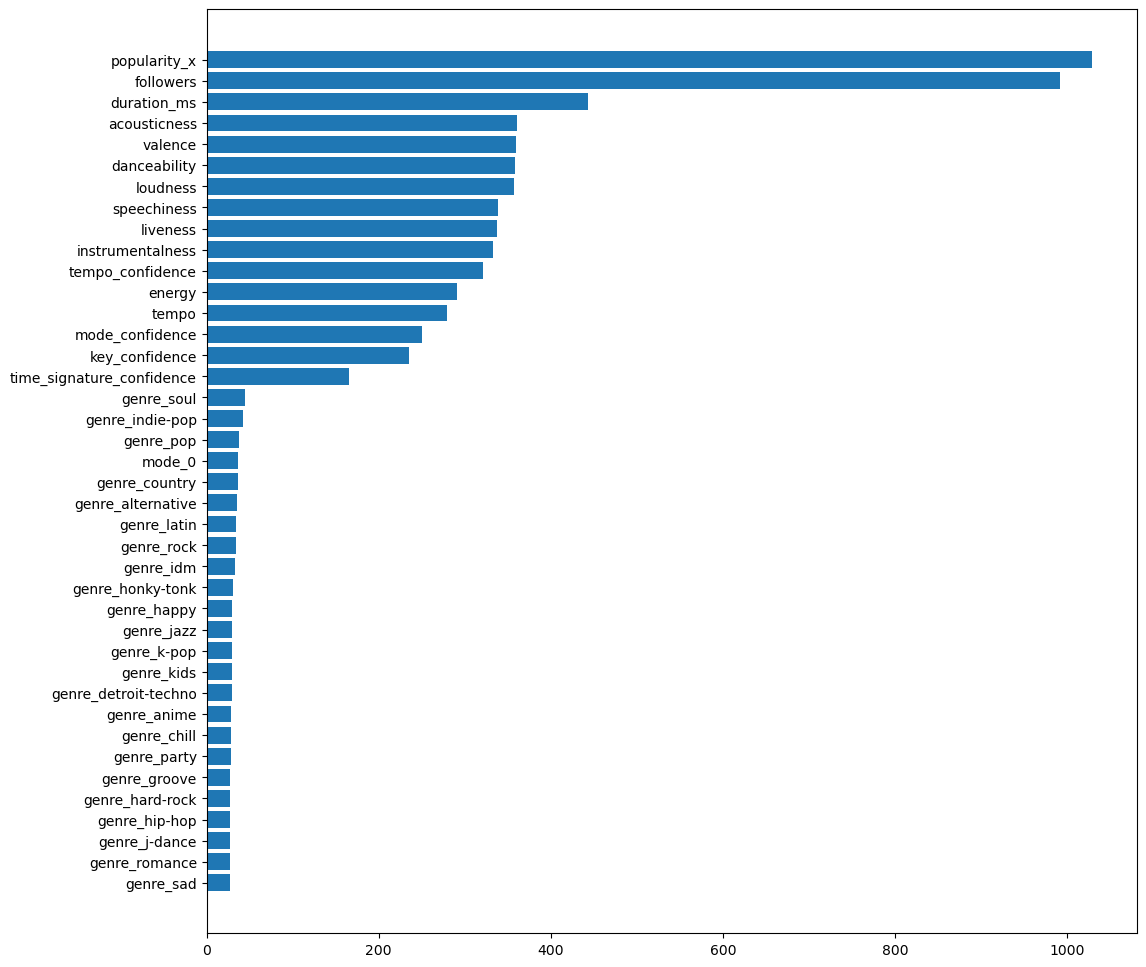

In [11]:
feature_imp = reg.feature_importances_
feature_names = reg.feature_name_

coef_list1 = sorted([(feature,coef) for feature,coef in zip(feature_names, feature_imp)], key= lambda x: abs(x[1]), reverse=True)
plt.figure(figsize=(12,12))
plt.barh(list(reversed([el[0] for el in coef_list1[:40]])),list(reversed([abs(el[1]) for el in coef_list1[:40]])))
plt.show()